https://drive.google.com/drive/folders/1HeTSIY5Xmd2vk2eAOlIjnSwlX45XciHv?usp=drive_link

Use the starter notebook and write code to help you: 
1. Specify an ML model that can understand both images and text into Weaviate
2. Add the provided data to your vector database - feel free to use your own images for this aswell!
3. Search the data with a text query
4. Search the data with an image query.

In [1]:
import pickle, weaviate, json, os, IPython

### We first need to start a local instance of Weaviate using Docker.

1. This can be done by opening up a terminal in the folder with the provided `docker-compose.yml` file in it and typing:
```bash
docker compose up
```

2. Later, in order to bring Weaviate down you can just go into this terminal window and type `Ctrl + C`

In [48]:
#Connect to locally hosted Weaviate and check if everything is ready

client = weaviate.connect_to_local(host="localhost", port=8080, grpc_port=50051, skip_init_checks=True)

# Check that Weaviate is up and live
if client.is_live():
    print("Weaviate is live!")
else:
    print("Weaviate is not reachable.")

print(f"Client created:? {client.is_ready()}")

Weaviate is live!
Client created:? True


In [49]:
if client.collections.exists("ClipExample"):
    client.collections.delete("ClipExample")

### Q1: Specify an ML model that can understand both images and text into Weaviate

In [50]:
#To do this we need to specify a schema in which we can specify the model to be used
# aswell as the properties. 

class_obj = {
    "class": "ClipExample",  # use "name" instead of "class"
    "vectorizer": "multi2vec-clip",
    "moduleConfig": {
        "multi2vec-clip": {"imageFields": ["image"]}
    },
    "properties": [
        {"name": "text", "dataType": ["string"]},
        {"name": "image", "dataType": ["blob"]}
        
    ]
}

# Create the collection using the collections API
client.collections.create_from_dict(class_obj)
print("Collection 'ClipExample' created successfully.")

Collection 'ClipExample' created successfully.


In [14]:
import os
print(os.getcwd())

C:\Users\chhab\dev\introduction-to-ai-native-vector-databases-4470531


### Q2: Add the provided data to your vector database - feel free to use your own images for this aswell!

In [51]:
# Here we will pass in a larger dataset into a folder called "Images"

#If you'd like to add your own images to the vector database to search over
# feel free to add them into this folder aswell!
clip_collections = client.collections.get("ClipExample")
for img in os.listdir("03_03/Images/"):
    print(f"Images/{img}")

    encoded_image = weaviate.util.image_encoder_b64(f"03_03/Images/{img}")
    data_properties = {
        "image": encoded_image,
        "text": img
    }
    clip_collections.data.insert(
            properties=data_properties
            # class_name="Question"
    )
    
print("All images added!")

Images/Big Sur_ California_LIL_9678.jpg
Images/Bird feeder_LIL_134172.jpg
Images/Blue sky between skyscrapers_LIL_134160.jpg
Images/Cats on a chair_LIL_134151.jpg
Images/Cat_LIL_134138.jpg
Images/Cherry_LIL_134126.jpg
Images/Cityscape_LIL_134155.jpg
Images/Conservatory_LIL_9680.jpg
Images/Deer_LIL_134180.jpg
Images/Dog in motion_LIL_134175.jpg
Images/Feet under a skirt_LIL_134201.jpg
Images/Forest_LIL_134133.jpg
Images/Golden Gate Bridge from Presidio_LIL_9682.jpg
Images/Joshua Tree and California coast_LIL_9662.jpg
Images/Joshua Tree and California coast_LIL_9670.jpg
Images/Kitchen scene_LIL_134191.jpg
Images/Llama_LIL_134178.jpg
Images/Microphone_LIL_134215.jpg
Images/On a grassy hill_LIL_134221.jpg
Images/Onlookers contemplating_LIL_134225.jpg
Images/Ornate furniture_LIL_134195.jpg
Images/Pies and dishes_LIL_134217.jpg
Images/Point Reyes_ California_LIL_9672.jpg
Images/Reading outside_LIL_134129.jpg
Images/Single cyclist with land background_LIL_9376.dng
Images/Speaker_LIL_134226.jp

In [52]:
response = clip_collections.aggregate.over_all(total_count=True)
print(response.total_count)

31


### Q3. Search the data with a text query

In [53]:
from weaviate.classes.query import MetadataQuery, Filter

print("1")
response = clip_collections.query.near_text(query="open sea beach", limit=5, return_metadata=MetadataQuery(distance=True))

for o in response.objects:
    print(o.properties)
    print(o.metadata.distance)

1
2
[Object(uuid=_WeaviateUUIDInt('8129ad74-237d-47bb-9d07-c4088f62f3d4'), metadata=MetadataReturn(creation_time=None, last_update_time=None, distance=0.7255123853683472, certainty=None, score=None, explain_score=None, is_consistent=None, rerank_score=None), properties={'text': 'Point Reyes_ California_LIL_9672.jpg'}, references=None, vector={}, collection='ClipExample'), Object(uuid=_WeaviateUUIDInt('d20f890b-bccc-4d53-a295-c819ffd7459a'), metadata=MetadataReturn(creation_time=None, last_update_time=None, distance=0.7380608320236206, certainty=None, score=None, explain_score=None, is_consistent=None, rerank_score=None), properties={'text': 'Big Sur_ California_LIL_9678.jpg'}, references=None, vector={}, collection='ClipExample'), Object(uuid=_WeaviateUUIDInt('f46fa777-3ae2-456d-b4cf-b352a122675e'), metadata=MetadataReturn(creation_time=None, last_update_time=None, distance=0.7766464948654175, certainty=None, score=None, explain_score=None, is_consistent=None, rerank_score=None), prope

**Visualize some of the returned images:**

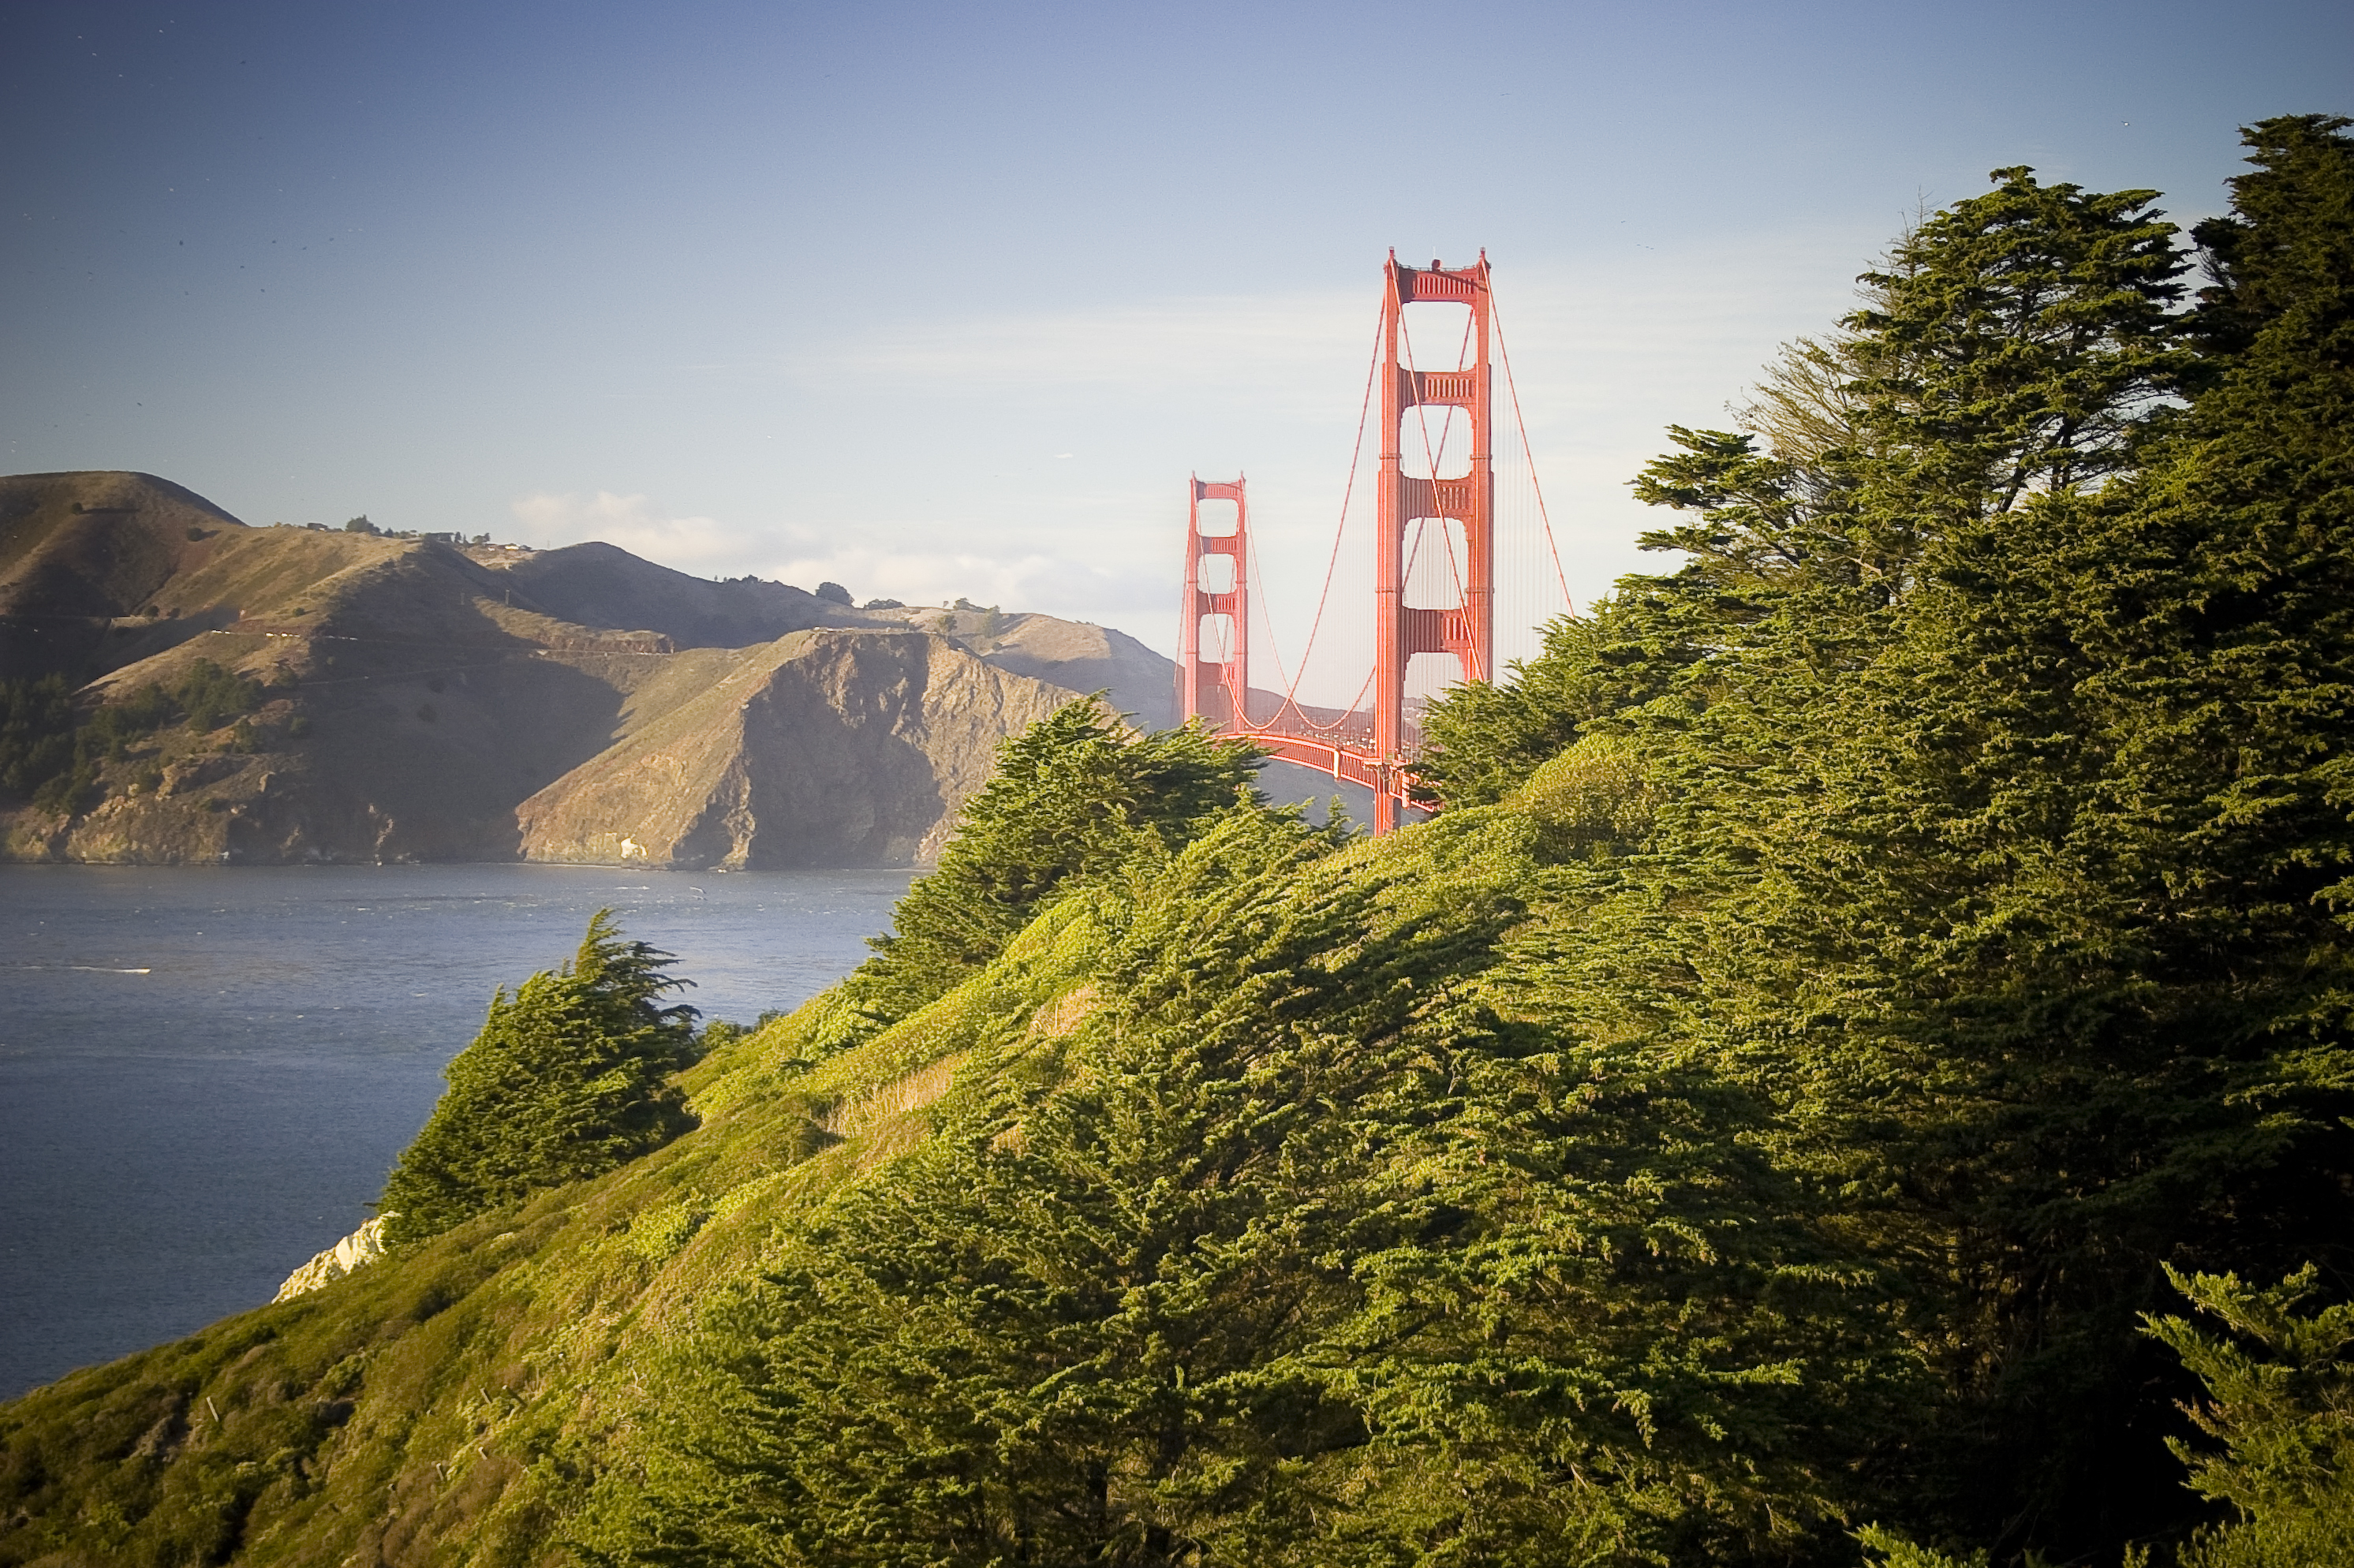

In [54]:
IPython.display.Image(filename="03_03/Images/Golden Gate Bridge from Presidio_LIL_9682.jpg", width=200)

In [63]:
from weaviate.classes.query import MetadataQuery, Filter

print("1")
response = clip_collections.query.near_image(near_image="03_03/TestImages/Cat outside_LIL_134200.jpg", limit=5, return_metadata=MetadataQuery(distance=True))

for o in response.objects:
    print(o.properties)
    print(o.metadata.distance)

1
{'text': 'Cat_LIL_134138.jpg'}
0.12137961387634277
{'text': 'Cats on a chair_LIL_134151.jpg'}
0.22747868299484253
{'text': 'Bird feeder_LIL_134172.jpg'}
0.28133559226989746
{'text': 'Dog in motion_LIL_134175.jpg'}
0.31132590770721436
{'text': 'Feet under a skirt_LIL_134201.jpg'}
0.31550347805023193


In [ ]:
# ADD CODE HERE

### Feel free to perform more searches and see if you can explain why specific text search queries return images! 

#### You've sucessfully used a vector database to build text-to-image search!

### Q4. Search the data with an image query.

- **Here we will pass in images that are not in the vector database and search for the most similar images as determined by vector search** 

- **These images can be found in the `TestImages` folder. Feel free to provide your own images as search queries here aswell!**

#### First visualize the image you want to query the database with:

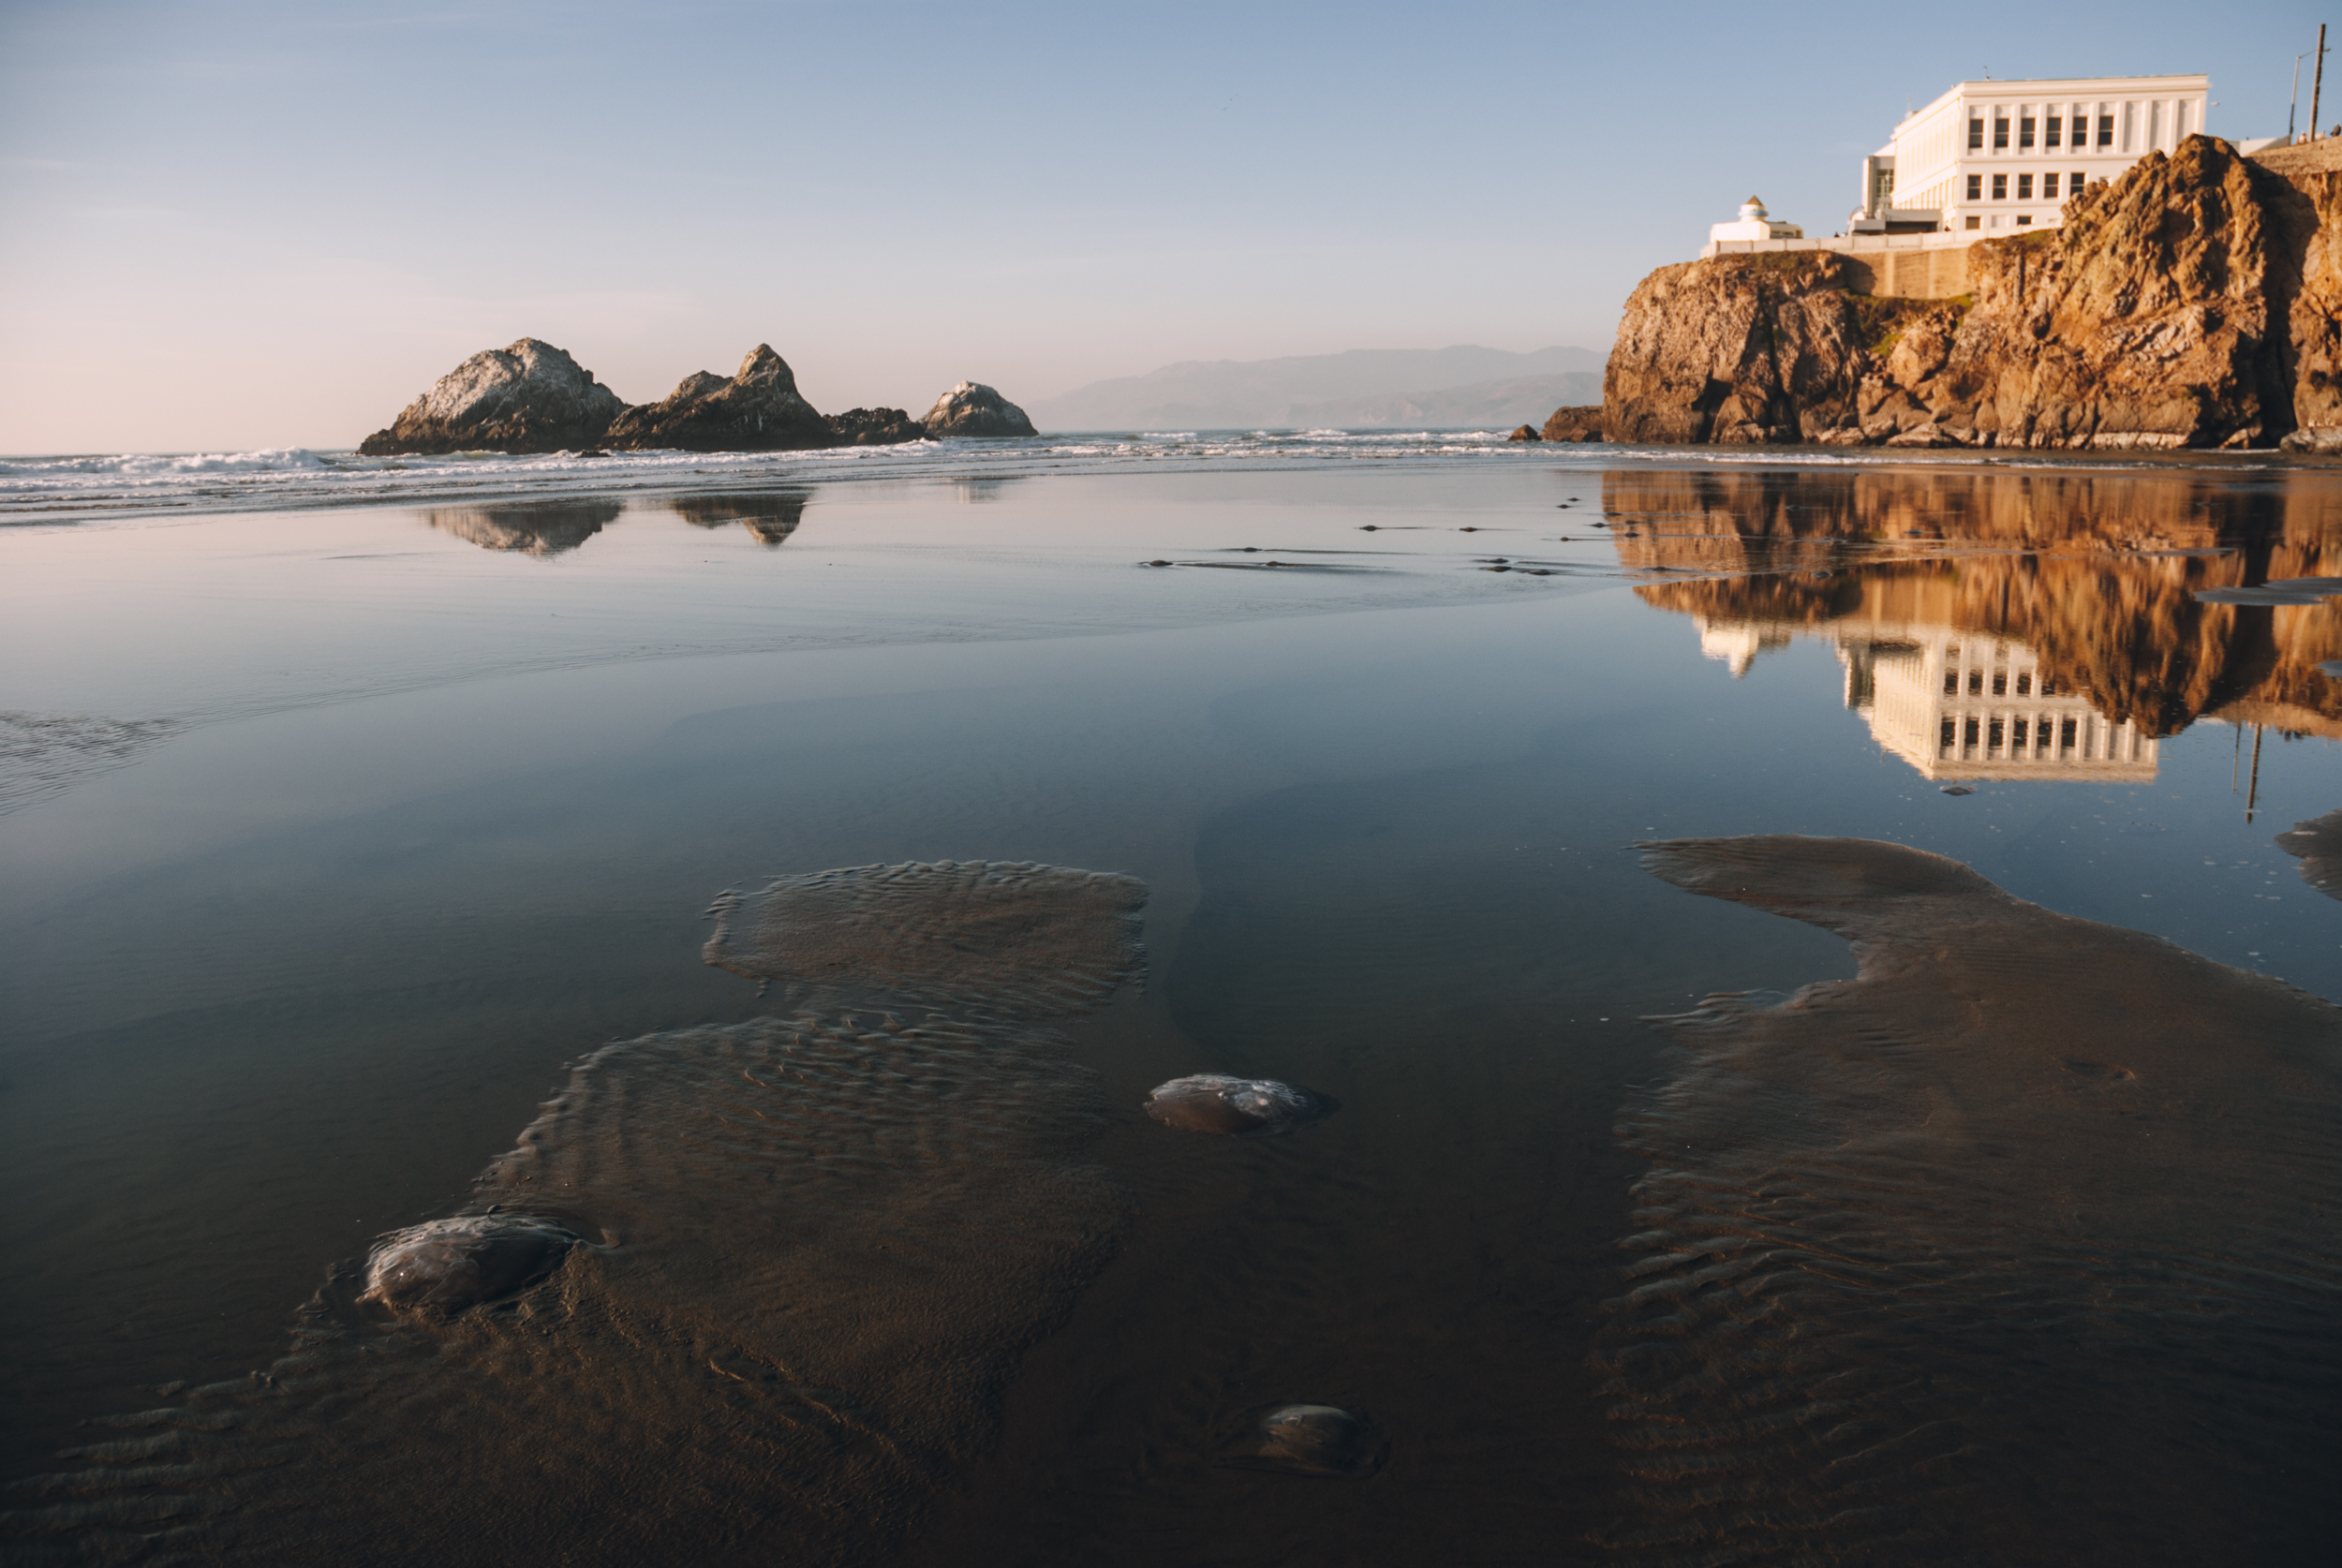

In [56]:
IPython.display.Image(filename='03_03/TestImages/Beach with a building_LIL_134146.jpg', width=200) 

#### Now let's write a query to search using this image:

In [ ]:
imres = # ADD CODE HERE

print(json.dumps(imres,indent=2))

**Visualize the images most similar to the input image**

In [ ]:
# ADD CODE HERE

In [ ]:
# ADD CODE HERE

In [ ]:
# ADD CODE HERE